# OER

## Prepare Data for sweep speed

In [1]:
import os
import shutil

base_dir = r"D:\projects\new_calculation\oer\sweeping\scan_rate_100mV"
ph_folders = ['pH_13', 'pH_14']

for ph in ph_folders:
    ph_path = os.path.join(base_dir, ph)
    if not os.path.exists(ph_path):
        continue

    for subdir in os.listdir(ph_path):
        sub_path = os.path.join(ph_path, subdir)
        input_file = os.path.join(sub_path, 'input.mkm')
        run_folder = os.path.join(sub_path, 'run')

        # Modify input.mkm if exists
        if os.path.isfile(input_file):
            with open(input_file, 'r') as f:
                lines = f.readlines()

            # Find &settings and add PRESSURE = -1 if not already present
            new_lines = []
            in_settings = False
            pressure_added = False

            for line in lines:
                if line.strip().startswith("&settings"):
                    in_settings = True
                elif in_settings and line.strip().startswith("&") and not line.strip().startswith("&settings"):
                    in_settings = False
                    if not pressure_added:
                        new_lines.append("PRESSURE = -1\n")
                        pressure_added = True

                if in_settings and "PRESSURE" in line:
                    pressure_added = True

                new_lines.append(line)

            if in_settings and not pressure_added:
                new_lines.append("PRESSURE = -1\n")

            with open(input_file, 'w') as f:
                f.writelines(new_lines)

        # Delete run folder if exists
        if os.path.isdir(run_folder):
            shutil.rmtree(run_folder)
            print(f"Deleted: {run_folder}")

print("Done")

Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.4\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.405\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.41\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.415\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.42\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.425\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.43\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.435\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.44\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.445\run
Deleted: D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_13\pH_13_U_0.45\run
Deleted: D:\proje

In [6]:
import os
import subprocess

# Base directory where your pH_xx and V_xx folders are located
base_directory = r"D:\projects\new_calculation\oer\sweeping\scan_rate_100mV"
#V_list=[0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7]
V_list=[0.4,0.405,0.41,0.415,0.42,0.425,0.43,0.435,0.44,0.445,0.45,0.455,0.46,0.465,0.47,0.475,0.48,0.485,0.49,0.495,0.5,0.505,0.51,0.515,0.52,0.525,0.53,0.535,0.54,0.545,0.55,0.555,0.56,0.565,0.57,0.575,0.58,0.585,0.59,0.595,0.6,0.605,0.61,0.615,0.62,0.625,0.63,0.635,0.64,0.645,0.65,0.655,0.66,0.665,0.67,0.675,0.68,0.685,0.69,0.695,0.7]

# Path to the mkmcxx executable
mkmcxx_path = r"D:\mkmcxx\mkmcxx-2.15.3-windows-x64\mkmcxx_2.15.3\bin\mkmcxx.exe"  # Replace with the correct path to mkmcxx.exe

# Function to extract coverage from the coverage.dat file
def extract_coverage(V_folder_path):
    coverage_dict = {}
    coverage_file_path = os.path.join(V_folder_path, "run", "range", "coverage.dat")
    
    if os.path.exists(coverage_file_path):
        with open(coverage_file_path, 'r') as file:
            lines = file.readlines()

        # Assuming coverage.dat has a header and the first column contains species names
        species_names = lines[0].strip().split()  # Extract species names from the header
        
        # Parse the coverage data
        for line in lines[1:]:
            values = line.strip().split()
            for i, species in enumerate(species_names):
                if species not in coverage_dict:
                    coverage_dict[species] = []
                coverage_dict[species].append(float(values[i]))  # Store coverage values for each species
        
    else:
        print(f"Warning: coverage.dat not found in {coverage_file_path}")
    
    return coverage_dict

# Function to run the input.mkm file using mkmcxx.exe
def run_mkmcxx(input_file_path):
    try:
        # Running the mkmcxx command
        subprocess.run([mkmcxx_path, "-i", input_file_path], check=True)
        print(f"Successfully ran mkmcxx on {input_file_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error running mkmcxx on {input_file_path}: {e}")

# Function to update input.mkm file with coverage data from the previous potential
def update_input_file_with_coverage(input_file_path, coverage_dict):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Assuming the line to be updated is the one with species names containing '*'
    updated_lines = []
    for line in lines:
        # Only modify lines that start with species names containing '*'
        if "*" in line.strip().split(';')[0]:
            new_line = line.strip().split(';')
            species_name = new_line[0].strip()
            if species_name in coverage_dict:
                coverage_value = coverage_dict[species_name][-1]  # Get the last coverage value from the previous potential
                new_line[2] = f'{coverage_value:.2e}'  # Update the coverage value in the third column

            # Join the updated line and add it to updated_lines
            updated_lines.append(';'.join(new_line))
            updated_lines.append('\n')  # Add a new line after the updated line
        else:
            updated_lines.append(line)

    # Write the updated lines back to the input.mkm file
    with open(input_file_path, 'w') as file:
        file.writelines(updated_lines)



# Traverse through the directory structure: base -> pH_xx -> V_xx -> run input.mkm
for pH_folder in os.listdir(base_directory):
    pH_folder_path = os.path.join(base_directory, pH_folder)

    # Ensure we're looking at folders starting with 'pH_'
    if os.path.isdir(pH_folder_path) and pH_folder.startswith("pH_"):
        
        coverage_dict = {}  # Initialize coverage dictionary

        # Traverse through V_list to handle each potential step by step
        for V in V_list:
            V_folder = f"pH_{pH}_U_{round(V,3)}"  # Create folder name for each potential

            V_folder_path = os.path.join(pH_folder_path, f"pH_{pH}_U_{round(V,3)}")


            # Ensure we're looking at folders starting with 'V_'
            if os.path.isdir(V_folder_path):
                input_file_path = os.path.join(V_folder_path, "input.mkm")

                # For the first potential V=0, no previous coverage is available
                if V == 0.4:
                    print(f"Running simulation for {V_folder}...")
                    if os.path.exists(input_file_path):
                        os.chdir(V_folder_path)  # Change directory to the V_xx folder
                        run_mkmcxx(input_file_path)  # Run the simulation for V=0
                        os.chdir(base_directory)  # Change back to the base directory
                else:
                    # For subsequent potentials, extract coverage from the previous potential
                    prev_V_index = V_list.index(V) - 1  # Get previous index
                    if prev_V_index >= 0:  # Ensure it's within bounds
                        prev_V = V_list[prev_V_index]
                    else:
                        prev_V = None  # No previous potential for the first one

                    
                    prev_V_folder = f"pH_{pH}_U_{prev_V}"
                    prev_V_folder_path = os.path.join(pH_folder_path, prev_V_folder)
                    coverage_dict = extract_coverage(prev_V_folder_path)

                    print(f"Running simulation for {V_folder} with coverage from {prev_V_folder}...")
                    if os.path.exists(input_file_path):
                        update_input_file_with_coverage(input_file_path, coverage_dict)  # Update input file with coverage
                        os.chdir(V_folder_path)  # Change directory to the V_xx folder
                        run_mkmcxx(input_file_path)  # Run the simulation for the current potential
                        os.chdir(base_directory)  # Change back to the base directory
                    else:
                        print(f"Warning: input_file.mkm not found in {V_folder_path}")

print("All simulations have been completed.")

Running simulation for pH_14_U_0.4...
Successfully ran mkmcxx on D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_14\pH_14_U_0.4\input.mkm
Running simulation for pH_14_U_0.405 with coverage from pH_14_U_0.4...
Successfully ran mkmcxx on D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_14\pH_14_U_0.405\input.mkm
Running simulation for pH_14_U_0.41 with coverage from pH_14_U_0.405...
Successfully ran mkmcxx on D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_14\pH_14_U_0.41\input.mkm
Running simulation for pH_14_U_0.415 with coverage from pH_14_U_0.41...
Successfully ran mkmcxx on D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_14\pH_14_U_0.415\input.mkm
Running simulation for pH_14_U_0.42 with coverage from pH_14_U_0.415...
Successfully ran mkmcxx on D:\projects\new_calculation\oer\sweeping\scan_rate_100mV\pH_14\pH_14_U_0.42\input.mkm
Running simulation for pH_14_U_0.425 with coverage from pH_14_U_0.42...
Successfully ran mkmcxx on D:\project

In [5]:
pH=14

In [ ]:
import os
import shutil  # Import shutil to remove directories

base_directory = r"D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_100mV_latest"

# Define pH values and V values
pH_list = [13,14]
V_list = [0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7]

# Define the new line format
new_line_format = '298  ;{V} ;0.1;1e-20;1e-10'  # Replace with the correct potential V

# Loop through each pH and each potential
for pH in pH_list:
    path1 = f"pH_{pH}"
    base_path = os.path.join(base_directory, path1)

    # Loop through each potential V
    for V in V_list:
        # Create the path to the potential folder
        V_path = os.path.join(base_path, f"V_{V}")
        
        # Check if the input file exists in this folder
        input_file_path = os.path.join(V_path, "input.mkm")
        if os.path.exists(input_file_path):
            # Open the file, read all lines, and replace the old line
            with open(input_file_path, 'r') as file:
                lines = file.readlines()

            # Modify the specific line and remove unwanted lines
            with open(input_file_path, 'w') as file:
                for line in lines:
                    if '298;0' in line and ';' in line:  # We look for the line starting with '298'
                        # Replace the second column with the current potential value
                        new_line = new_line_format.format(V=V)
                        file.write(new_line + '\n')  # Write the new line
                    elif 'Name;' in line or 'isSite;' in line:  # Remove lines starting with 'Name;' or 'isSite;'
                        continue  # Skip these lines
                    elif "free" in line:
                        continue
                    else:
                        file.write(line)  # Write the unchanged lines
            print(f"Updated {input_file_path}")

        # Check if there is a 'run' folder and delete it
        run_folder_path = os.path.join(V_path, "run")
        if os.path.exists(run_folder_path):
            shutil.rmtree(run_folder_path)  # Delete the 'run' folder
            print(f"Deleted 'run' folder in {V_path}")

print("All files have been updated, 'run' folders have been deleted, and unnecessary lines were removed.")

Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.4\input.mkm
Deleted 'run' folder in D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.4
Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.41\input.mkm
Deleted 'run' folder in D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.41
Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.42\input.mkm
Deleted 'run' folder in D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.42
Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.43\input.mkm
Deleted 'run' folder in D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.43
Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.44\input.mkm
Deleted 'run' folder in D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.44
Updated D:\projects\mkm_shell\Codes\USS_Rajan\sweep_speed_10mV\pH_13\V_0.45\input.mkm
Deleted 'run' folder in D:

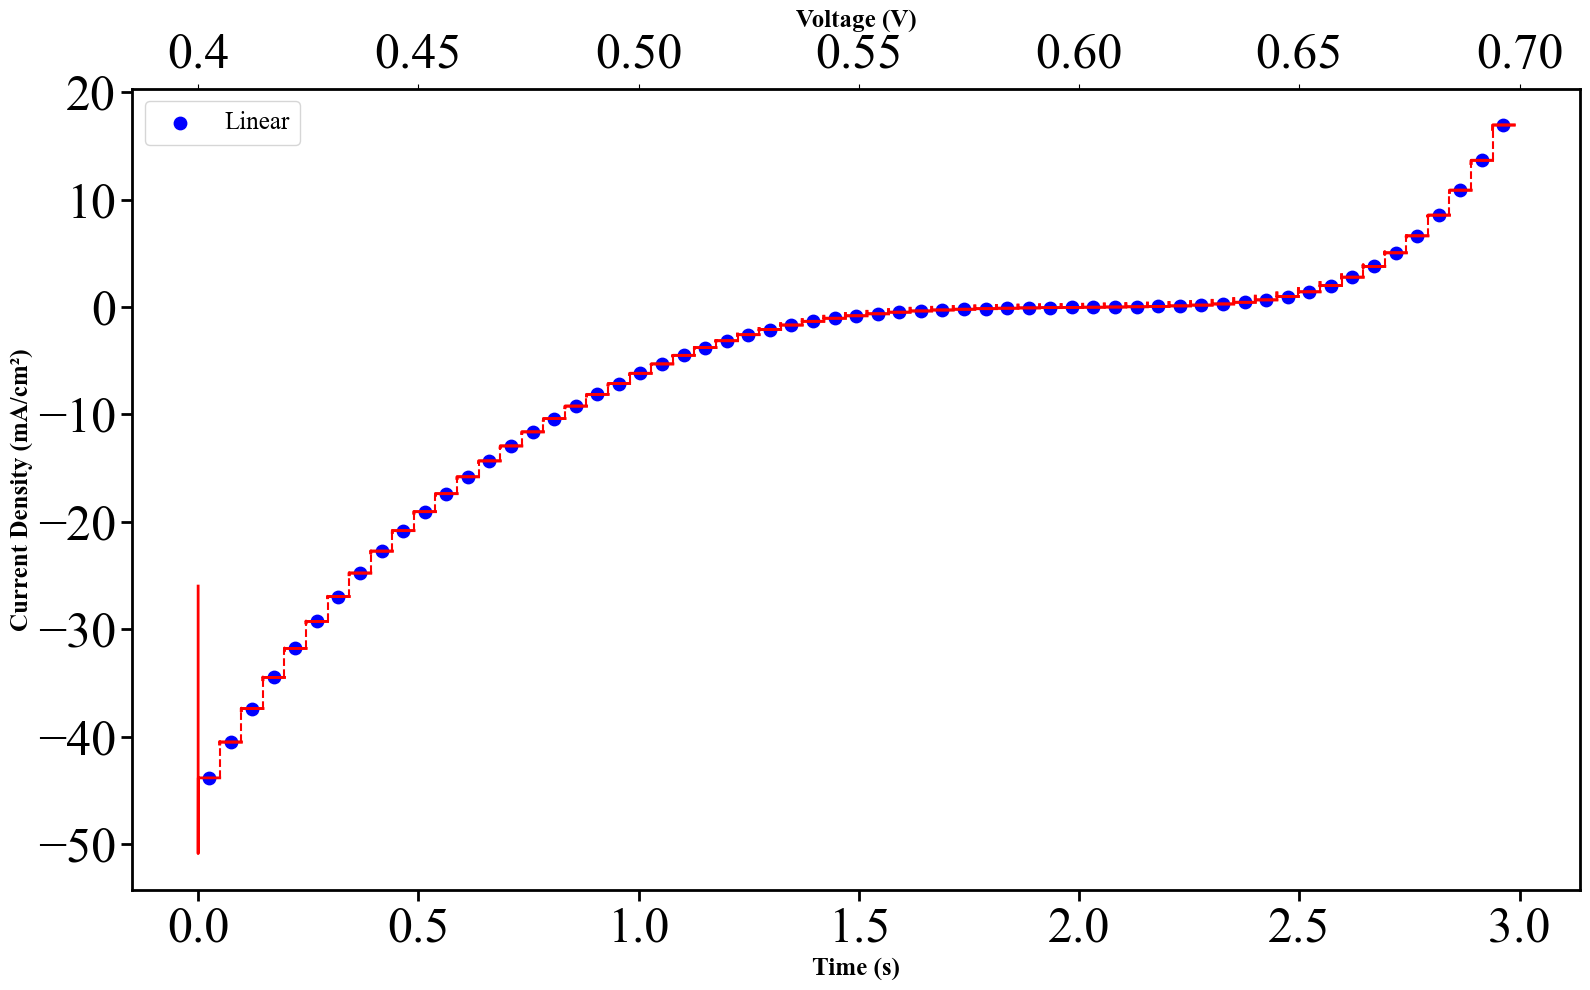

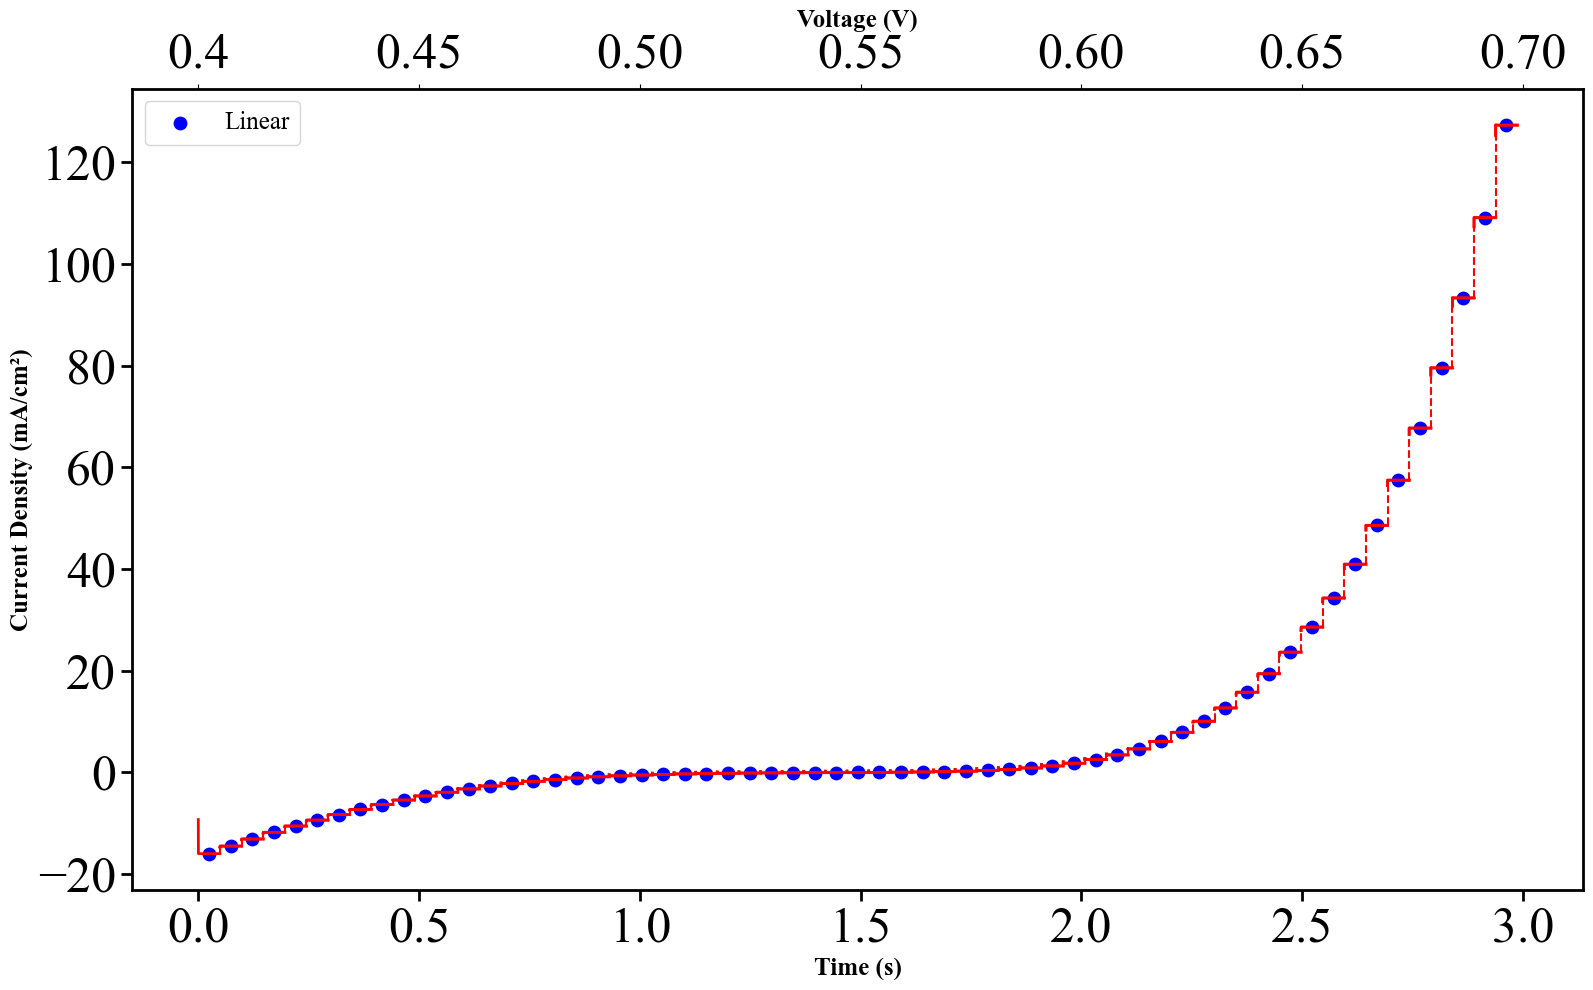

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rc('font', family='Times New Roman')

#  to read dat

def get_coverage_data(V,pH, path):
    path = os.path.join(path, f"pH_{pH}_U_{V}", "run", "298K")  # Adjusted path to 'range'
    cov_file = open(os.path.join(path, "coverage.dat"))
    cov_lines = cov_file.readlines()
    cov_file.close()
    
    time_data = []
    cov_dat_dict = {}

    # Read the coverage data
    adsorbate_keys = cov_lines[0].strip().split()  # This extracts the column headers
        
    # Initialize dictionary with the species that are of interest (dynamically)
    species_of_interest = ['I1*', 'I2*', 'I3*', 'I4*']
    
    for species in species_of_interest:
        if species in adsorbate_keys:  # Only initialize species that exist in the file
            cov_dat_dict[species] = []
        else:
            print(f"Warning: Species {species} not found in coverage data.")

    # Extract time and coverage data for each species
    for line in cov_lines[1:]:
        vals = line.strip().split()
        
        # Ensure there is enough data in the line
        if len(vals) == len(adsorbate_keys):  # +1 for the time value
            time_data.append(float(vals[0]))  # Time is the first value
            for c, key in enumerate(adsorbate_keys):
                if key in cov_dat_dict:  # Only store coverage data for species we care about
                    cov_dat_dict[key].append(float(vals[c]))  # Coverage data for each species
    
    return time_data, cov_dat_dict



def current_density(pH, U, coverages):
    # Constants
    kB = 8.617e-5  # Boltzmann constant (eV/K)
    nu = 6.21e+12  # KbT/h (s^-1)
    T = 298.15  # Temperature in Kelvin
    lambda_H = 0.75  # Example value for lambda_H
    lambda_OH = 2.47  # Example value for lambda_OH
    w_water = 0.07  # Example value for w_water
    w_ions = 0.65  # Example value for w_ions
    C_sites = 2.27e12  # Active site density (cm^-2)
    
    # Standard reduction potential (V) vs RHE
    E_red_H = [1.374, 1.229, 1.312, 1.001]  # H+ reactions
    E_red_OH = [1.374, 1.229, 1.312, 1.001]  # OH- reactions
    
    # Stoichiometric coefficients
    stoich_H = np.array([[1, 0, 0], [1, 0, 1], [1, 0, 1], [1, 0, 0]])
    stoich_OH = np.array([[0, 1, -1], [0, 1, 0], [0, 1, 0], [0, 1, -1]])

    # Convert Hg/HgO potential to RHE
    U = np.array(U)  # Ensure U is a numpy array
    pH = np.array(pH)  # Ensure pH is a numpy array
    U_RHE = U + 0.098 + 0.059 * pH

    # Bulk free energy for H+ and OH- reactions
    Gbulk_H = np.array(E_red_H) - U_RHE
    Gbulk_OH = np.array(E_red_OH) - U_RHE

    # Delta w for H+ and OH-
    del_w_H = np.dot(stoich_H, np.array([w_ions, w_ions, w_water]))
    del_w_OH = np.dot(stoich_OH, np.array([w_ions, w_ions, w_water]))

    # H+ based reactions
    GmarcusH = Gbulk_H + del_w_H
    GfH = (lambda_H / 4) * (1 + GmarcusH / lambda_H) ** 2
    KfH = nu * np.exp(-GfH / (kB * T))
    GbH = GfH - GmarcusH
    KbH = nu * np.exp(-GbH / (kB * T))

    # OH- based reactions
    GmarcusOH = Gbulk_OH + del_w_OH
    GfOH = (lambda_OH / 4) * (1 + GmarcusOH / lambda_OH) ** 2
    KfOH = nu * np.exp(-GfOH / (kB * T))
    GbOH = GfOH - GmarcusOH
    KbOH = nu * np.exp(-GbOH / (kB * T))

    # Calculation of activities
    molarity = 55.34  # Molarity of H2O
    Kw = 1.01e-14  # Water dissociation constant
    solubilityO2 = 2.69e-4  # Solubility of O2 in mol/L

    # Activity of H+ and O2
    aH = 10 ** (-float(pH))  # Take the first element since we're dealing with a single value
    aO2 = 6.67e-3  # Activity of O2
    
    # Ensure the coefficients are properly computed element-wise
    coeffs = np.array([Kw / aH, molarity + aH + solubilityO2, -molarity])

    # Calculate the activity of H2O by solving for roots
    rts = np.roots(coeffs)
    aH2O = rts[rts > 0]  # Activity of H2O
    aOH = Kw * aH2O / aH  # Activity of OH-

    # Reaction rates for H+ and OH-
    rH = np.array([KfH[0] * coverages[0] * aH2O - KbH[0] * coverages[1] * aH,
                   KfH[1] * coverages[1] * aH2O ** 2 - KbH[1] * coverages[2] * aH * aO2,
                   KfH[2] * coverages[2] * aH2O ** 2 - KbH[2] * coverages[3] * aH,
                   KfH[3] * coverages[3] * aH2O - KbH[3] * coverages[0] * aH])
    
    rOH = np.array([KfOH[0] * coverages[0] * aOH - KbOH[0] * coverages[1] * aH2O,
                    KfOH[1] * coverages[1] * aOH - KbOH[1] * coverages[2] * aO2,
                    KfOH[2] * coverages[2] * aOH - KbOH[2] * coverages[3],
                    KfOH[3] * coverages[3] * aOH - KbOH[3] * coverages[0] * aH2O])
    
    # Current densities for H+ and OH- reactions
    jH = np.sum(rH) * 1.602e-19 * 1000 * C_sites  # Convert from A to mA
    jOH = np.sum(rOH) * 1.602e-19 * 1000 * C_sites  # Convert from A to mA
    
    # Net reaction rate
    net_rate = rH + rOH
    j_total = np.sum(net_rate) * 1.602e-19 * 1000 * C_sites  # Total current density

    return  j_total

def generate_combined_plots(base_directory):
    V_values = [0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 
                0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 
                0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 
                0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 
                0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7]  
    pH_values = [13, 14]
    species_of_interest = 'I1*'

    line_color = "red"
    scatter_color = "blue"

    for pH in pH_values:
        fig, ax = plt.subplots(figsize=(16, 10))
        cumulative_time = 0
        previous_time = None
        previous_j_eth = None

        # Variables for scatter plot
        midpoint_times = []
        average_currents = []

        for i, V_val in enumerate(V_values):
            path = os.path.join(base_directory, f"pH_{pH}")
            time_data, coverage_data = get_coverage_data(V_val, pH, path)

            if species_of_interest in coverage_data:
                thetai1 = np.array(coverage_data.get("I1*", [0] * len(time_data)))
                thetai2 = np.array(coverage_data.get("I2*", [0] * len(time_data)))
                thetai3 = np.array(coverage_data.get("I3*", [0] * len(time_data)))
                thetai4 = np.array(coverage_data.get("I4*", [0] * len(time_data)))
                
                j_eth = [current_density(pH, V_val, [thetai1[l], thetai2[l], thetai3[l], thetai4[l]]) for l in range(len(thetai1))]
                adjusted_time = np.array(time_data) + cumulative_time

                # Plot continuous line sweep
                if previous_time is not None and previous_j_eth is not None:
                    ax.plot(adjusted_time, j_eth, color=line_color, linestyle='-', linewidth=2)
                    ax.plot([previous_time, adjusted_time[0]], [previous_j_eth, j_eth[0]], linestyle='--', linewidth=1.5, color=line_color)

                ax.plot(adjusted_time, j_eth, color=line_color, linestyle='-', linewidth=2)

                previous_time = adjusted_time[-1]
                previous_j_eth = j_eth[-1]
                cumulative_time += max(time_data)

                # Compute last 25% average current density
                last_25_index = int(0.75 * len(j_eth))
                avg_j_eth_last_25 = np.mean(j_eth[last_25_index:])
                
                # Save data for scatter plot
                midpoint_time = cumulative_time - (max(time_data) / 2)
                midpoint_times.append(midpoint_time)
                average_currents.append(avg_j_eth_last_25)

        # Overlay scatter plot for last 25% average current density
        ax.scatter(midpoint_times, average_currents, color=scatter_color, s=80, marker='o', label="Linear")

        # Axis labels and formatting
        ax.set_xlabel("Time (s)", fontsize=18, fontweight='bold')
        ax.set_ylabel("Current Density (mA/cm²)", fontsize=18, fontweight='bold')
        ax.tick_params(axis='both', which='both', width=2, length=8, labelsize=36)

        # Secondary x-axis (Voltage)
        secax = ax.secondary_xaxis('top')
        secax.set_xlim(0, 30)
        secax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
        secax.set_xticklabels(["0.4", "0.45", "0.50", "0.55", "0.60", "0.65", "0.70"])
        secax.set_xlabel("Voltage (V)", fontsize=18, fontweight='bold')
        secax.tick_params(axis='x', labelsize=36)

        # Add border thickness
        for spine in ax.spines.values():
            spine.set_linewidth(2)

        ax.legend(fontsize=18) 
        plt.tight_layout()
        plt.show()

# Example usage
base_directory = r"D:\projects\new_calculation\oer\sweeping\scan_rate_100mV"
generate_combined_plots(base_directory)


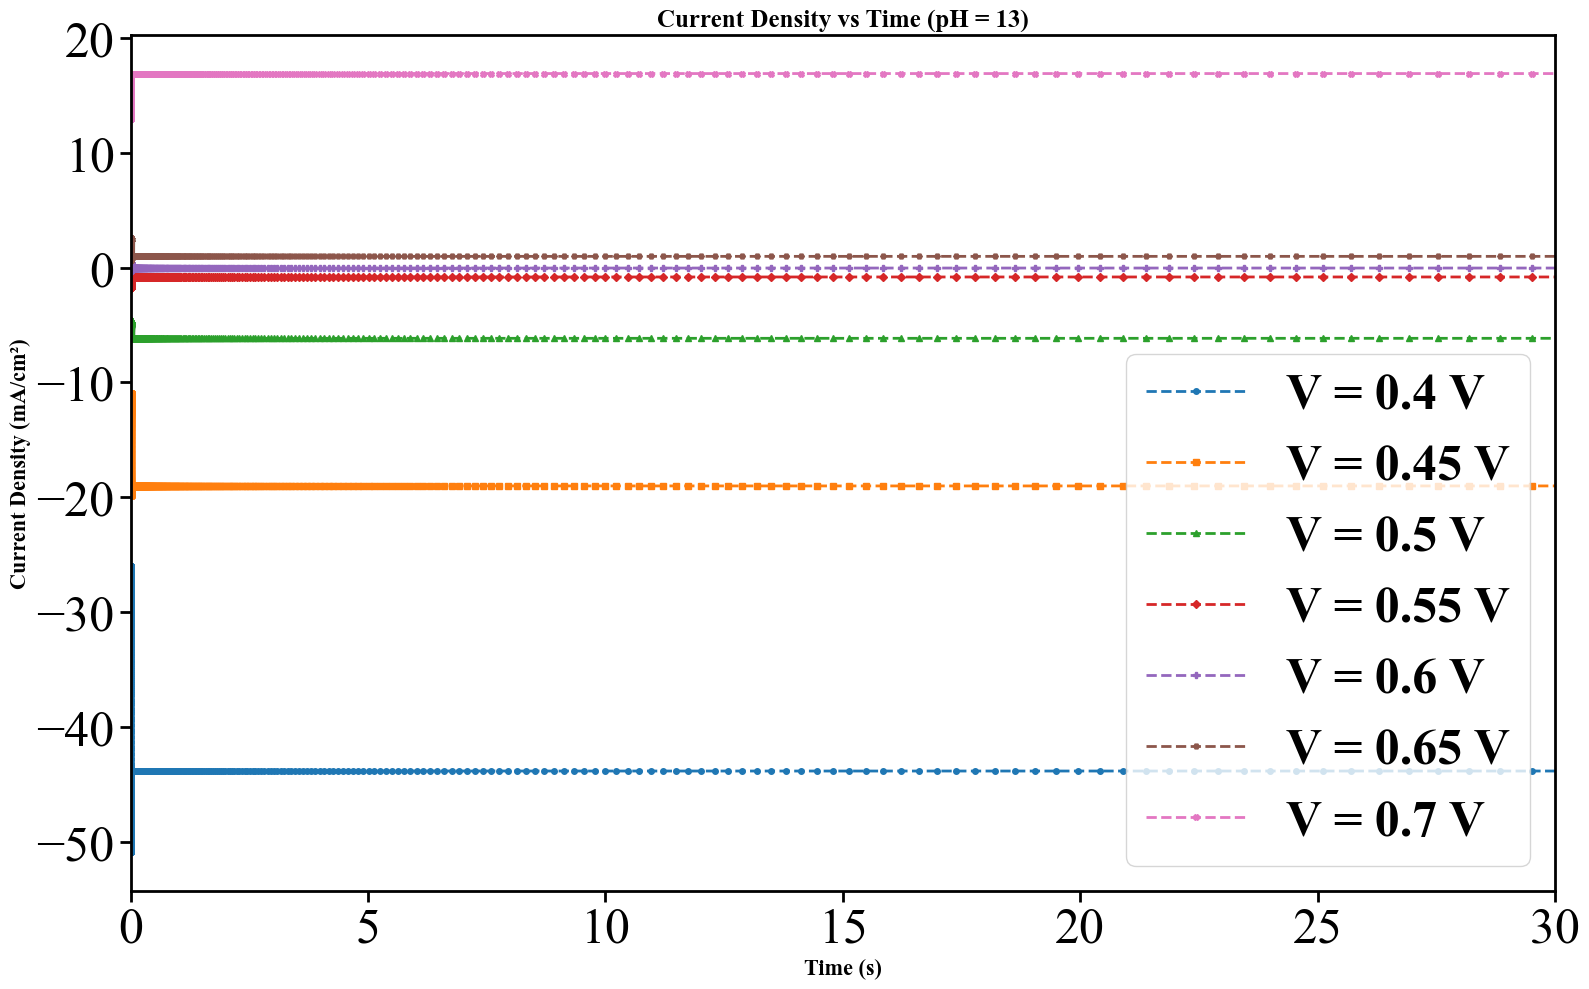

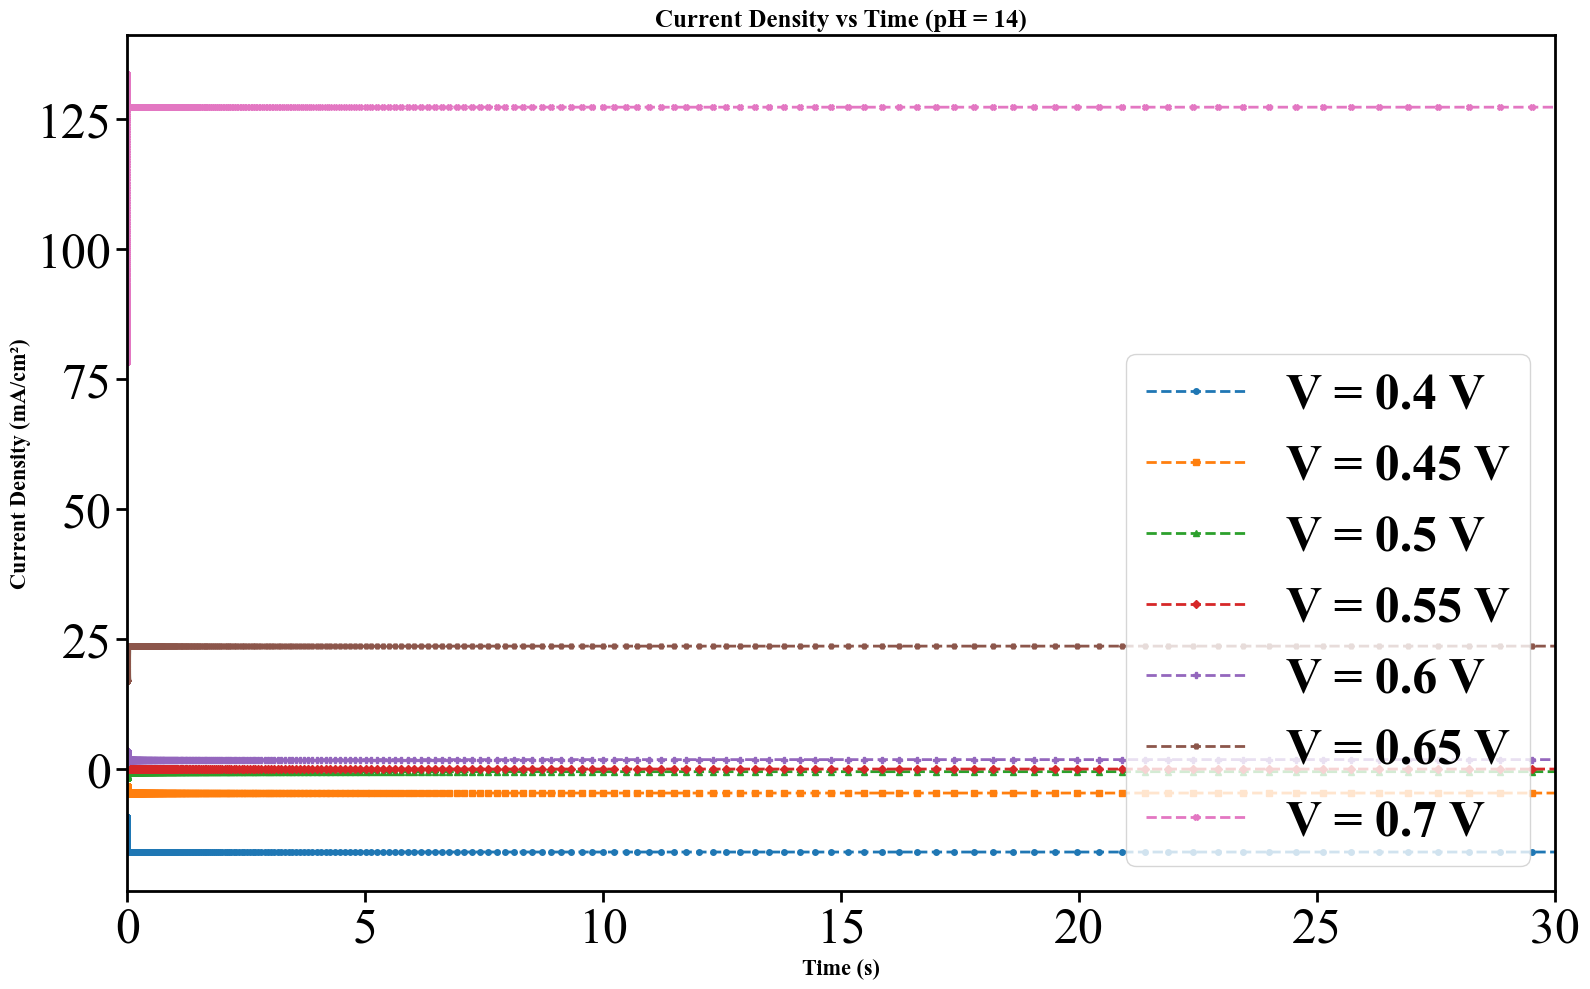

In [10]:
# Function to generate plots based on the base directory and pH
import matplotlib.pyplot as plt
import numpy as np
import os


import os
import matplotlib.pyplot as plt
import numpy as np

# Constants provided
kb = 8.617e-5  # Boltzmann constant (eV/K)
nu = 6.21e+12  # KbT/h (s^-1)
T = 298.15     # temperature (K)
q = 1.6e-19    # Elementary charge (C)
A = 7.06e-6    # Area (m^2)
k = 6.026e23
Csites = 2.27e12    # sites/cm^2   


# Helper function to calculate j_eth (current density) for each potential
def current_density(pH, U, coverages):
    # Constants
    kB = 8.617e-5  # Boltzmann constant (eV/K)
    nu = 6.21e+12  # KbT/h (s^-1)
    T = 298.15  # Temperature in Kelvin
    lambda_H = 0.75  # Example value for lambda_H
    lambda_OH = 2.47  # Example value for lambda_OH
    w_water = 0.07  # Example value for w_water
    w_ions = 0.65  # Example value for w_ions
    C_sites = 2.27e12  # Active site density (cm^-2)
    
    # Standard reduction potential (V) vs RHE
    E_red_H = [1.374, 1.229, 1.312, 1.001]  # H+ reactions
    E_red_OH = [1.374, 1.229, 1.312, 1.001]  # OH- reactions
    
    # Stoichiometric coefficients
    stoich_H = np.array([[1, 0, 0], [1, 0, 1], [1, 0, 1], [1, 0, 0]])
    stoich_OH = np.array([[0, 1, -1], [0, 1, 0], [0, 1, 0], [0, 1, -1]])

    # Convert Hg/HgO potential to RHE
    U = np.array(U)  # Ensure U is a numpy array
    pH = np.array(pH)  # Ensure pH is a numpy array
    U_RHE = U + 0.098 + 0.059 * pH

    # Bulk free energy for H+ and OH- reactions
    Gbulk_H = np.array(E_red_H) - U_RHE
    Gbulk_OH = np.array(E_red_OH) - U_RHE

    # Delta w for H+ and OH-
    del_w_H = np.dot(stoich_H, np.array([w_ions, w_ions, w_water]))
    del_w_OH = np.dot(stoich_OH, np.array([w_ions, w_ions, w_water]))

    # H+ based reactions
    GmarcusH = Gbulk_H + del_w_H
    GfH = (lambda_H / 4) * (1 + GmarcusH / lambda_H) ** 2
    KfH = nu * np.exp(-GfH / (kB * T))
    GbH = GfH - GmarcusH
    KbH = nu * np.exp(-GbH / (kB * T))

    # OH- based reactions
    GmarcusOH = Gbulk_OH + del_w_OH
    GfOH = (lambda_OH / 4) * (1 + GmarcusOH / lambda_OH) ** 2
    KfOH = nu * np.exp(-GfOH / (kB * T))
    GbOH = GfOH - GmarcusOH
    KbOH = nu * np.exp(-GbOH / (kB * T))

    # Calculation of activities
    molarity = 55.34  # Molarity of H2O
    Kw = 1.01e-14  # Water dissociation constant
    solubilityO2 = 2.69e-4  # Solubility of O2 in mol/L

    # Activity of H+ and O2
    aH = 10 ** (-float(pH))  # Take the first element since we're dealing with a single value
    aO2 = 6.67e-3  # Activity of O2
    
    # Ensure the coefficients are properly computed element-wise
    coeffs = np.array([Kw / aH, molarity + aH + solubilityO2, -molarity])

    # Calculate the activity of H2O by solving for roots
    rts = np.roots(coeffs)
    aH2O = rts[rts > 0]  # Activity of H2O
    aOH = Kw * aH2O / aH  # Activity of OH-

    # Reaction rates for H+ and OH-
    rH = np.array([KfH[0] * coverages[0] * aH2O - KbH[0] * coverages[1] * aH,
                   KfH[1] * coverages[1] * aH2O ** 2 - KbH[1] * coverages[2] * aH * aO2,
                   KfH[2] * coverages[2] * aH2O ** 2 - KbH[2] * coverages[3] * aH,
                   KfH[3] * coverages[3] * aH2O - KbH[3] * coverages[0] * aH])
    
    rOH = np.array([KfOH[0] * coverages[0] * aOH - KbOH[0] * coverages[1] * aH2O,
                    KfOH[1] * coverages[1] * aOH - KbOH[1] * coverages[2] * aO2,
                    KfOH[2] * coverages[2] * aOH - KbOH[2] * coverages[3],
                    KfOH[3] * coverages[3] * aOH - KbOH[3] * coverages[0] * aH2O])
    
    # Current densities for H+ and OH- reactions
    jH = np.sum(rH) * 1.602e-19 * 1000 * C_sites  # Convert from A to mA
    jOH = np.sum(rOH) * 1.602e-19 * 1000 * C_sites  # Convert from A to mA
    
    # Net reaction rate
    net_rate = rH + rOH
    j_total = np.sum(net_rate) * 1.602e-19 * 1000 * C_sites  # Total current density

    return  j_total


# Function to read coverage data
def get_coverage_data(V,pH, path):
    path = os.path.join(path, f"pH_{pH}_U_{V}", "run", "298K")  # Adjusted path to 'range'
    cov_file = open(os.path.join(path, "coverage.dat"))
    cov_lines = cov_file.readlines()
    cov_file.close()
    
    time_data = []
    cov_dat_dict = {}

    # Read the coverage data
    adsorbate_keys = cov_lines[0].strip().split()  # This extracts the column headers
        
    # Initialize dictionary with the species that are of interest (dynamically)
    species_of_interest = ['I1*', 'I2*', 'I3*', 'I4*']
    
    for species in species_of_interest:
        if species in adsorbate_keys:  # Only initialize species that exist in the file
            cov_dat_dict[species] = []
        else:
            print(f"Warning: Species {species} not found in coverage data.")

    # Extract time and coverage data for each species
    for line in cov_lines[1:]:
        vals = line.strip().split()
        
        # Ensure there is enough data in the line
        if len(vals) == len(adsorbate_keys):  # +1 for the time value
            time_data.append(float(vals[0]))  # Time is the first value
            for c, key in enumerate(adsorbate_keys):
                if key in cov_dat_dict:  # Only store coverage data for species we care about
                    cov_dat_dict[key].append(float(vals[c]))  # Coverage data for each species
    
    return time_data, cov_dat_dict

# Choose distinct colors and markers for each potential
def extract_rate_constants(V,pH,file_path):
    """
    Function to extract rate constants from the 'k_constants.dat' file.
    
    Args:
        file_path (str): Path to the 'k_constants.dat' file.
    
    Returns:
        dict: A dictionary where the keys are temperatures and the values are dictionaries of rate constants.
    """
    rate_constants = {}
    file_path = os.path.join(file_path, f"pH_{pH}_U_{V}", "run", "range","k_constants.dat")
    # Define the keys for rate constants (assumed order in the file)
    rate_constant_keys = [
        'kf1', 'kb1', 'kf2', 'kb2', 'kf3', 'kb3', 'kf4', 'kb4',
        'kf5', 'kb5', 'kf6', 'kb6', 'kf7', 'kb7', 'kf8', 'kb8'
    ]
    
    # Open and read the file
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # Skip the header line (if present)
        header = lines[0].strip().split()
        
        # Iterate through each line and extract rate constants
        for line in lines[1:]:
            # Split the line into individual values
            values = line.strip().split()
            
            # Extract temperature and rate constants
            temperature = float(values[0])  # Temperature is the first value
            rate_constants[temperature] = {}

            # Store rate constants with their respective keys
            for i, key in enumerate(rate_constant_keys):
                if i < len(values) - 1:  # Ensure there are enough values for each key
                    rate_constants[temperature][key] = float(values[i + 1])

        return rate_constants

    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None
    except Exception as e:
        print(f"Error: An unexpected error occurred: {e}")
        return None
def generate_plots(base_directory):
    #V=[0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7]
    V=[0.4,0.45,0.5,0.55,0.6,0.65,0.7]
    #V=[0.55,0.6,0.65,0.7]
    species_of_interest = 'I1*'
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'deepskyblue']
    markers = ['o', 's', '^', 'D', 'P', 'H', 'X', 'v', '<', '>', '1']  # Different markers for each potential

    # Create separate plots for pH = 7 and pH = 13
    for pH in [13, 14]:
        # Create a separate figure for each pH
        fig, ax = plt.subplots(figsize=(16, 10))

        # Loop through different potentials (V values)
        k=0
        for i, V_val in enumerate(V):
            path1 = "pH_" + str(pH)
            path = os.path.join(base_directory, path1)

            rate_constants = extract_rate_constants(V_val,pH, path)
            kf1 = rate_constants[298.0]['kf1']
            kb1 = rate_constants[298.0]['kb1']
            kf2 = rate_constants[298.0]['kf2']
            kb2 = rate_constants[298.0]['kb2']
            kf3 = rate_constants[298.0]['kf3']
            kb3 = rate_constants[298.0]['kb3']
            kf4 = rate_constants[298.0]['kf4']
            kb4 = rate_constants[298.0]['kb4']
            kf5 = rate_constants[298.0]['kf5']
            kb5 = rate_constants[298.0]['kb5']
            kf6 = rate_constants[298.0]['kf6']
            kb6 = rate_constants[298.0]['kb6']
            kf7 = rate_constants[298.0]['kf7']
            kb7 = rate_constants[298.0]['kb7']
            kf8 = rate_constants[298.0]['kf8']
            kb8 = rate_constants[298.0]['kb8']
            # Get time and coverage data for the current potential and pH
            time_data, coverage_data = get_coverage_data(V_val,pH, path)

            if species_of_interest in coverage_data:  # Check if species is present in the data
                # Extract coverage values for the species
                aOH = np.array(coverage_data.get("OH", [0] * len(time_data)))  # Default to 0 if not found
                aH2O = np.array(coverage_data.get("H2O", [0] * len(time_data)))
                aH3O = np.array(coverage_data.get("H30", [0] * len(time_data)))  # Default to 0 if not found
                aO2 = np.array(coverage_data.get("O2", [0] * len(time_data)))  # Default to 0 if not found
                thetai1 = np.array(coverage_data.get("I1*", [0] * len(time_data)))  # Default to 0 if not found
                thetai2 = np.array(coverage_data.get("I2*", [0] * len(time_data)))  # Default to 0 if not found
                thetai3 = np.array(coverage_data.get("I3*", [0] * len(time_data)))  # Default to 0 if not found
                thetai4 = np.array(coverage_data.get("I4*", [0] * len(time_data)))  # Default to 0 if not found

                # Calculate rate constants for this potential
                j_eth = []  # Initialize j_eth for each potential
                a=[]
                for l in range(len(thetai1)):
                    j = current_density(pH, V_val, [thetai1[l], thetai2[l], thetai3[l], thetai4[l]])
                    j_eth.append(j)

                    if pH == 13.3 and V_val == 0.6:
                        #print(current_density(pH, V_val, [thetai1[l], thetai2[l], thetai3[l], thetai4[l]]))
                        a.append(thetai1[l])


                # Ensure that j_eth and time_data have the same length
                if len(j_eth) == len(time_data):
                    # Plot j_eth vs time with different color and marker for each V
                    ax.plot(time_data, j_eth, label=f'V = {V_val} V',  markersize=4,marker=markers[k],color=colors[k], linestyle='--', linewidth=2)
                    k=k+1
                else:
                    print(f"Warning: Mismatch in lengths for V = {V_val}")

        # Extract the sweep speed by splitting the directory name
        directory_name = os.path.basename(base_directory)
        sweep_speed = directory_name.split('_')[-1]

        # Set labels and title with bold font and increased font size
        ax.set_xlabel("Time (s)", fontsize=16, fontweight='bold')  # Increased font size for x-label
        ax.set_ylabel(f"Current Density (mA/cm²)", fontsize=16, fontweight='bold')  # Increased font size for y-label
        ax.set_title(f"Current Density vs Time (pH = {pH})", fontsize=18, fontweight='bold')

        # Set both axes to logarithmic scale
        #ax.set_xscale('log')
        #ax.set_yscale('log')

        # Add a legend with bold font and increased font size
        #ax.legend(title="Potential (V)", bbox_to_anchor=(0.6, 0.2), loc='upper left', prop={'weight': 'bold', 'size': 20})
        ax.legend(loc='lower right', prop={'weight': 'bold', 'size': 36}, frameon=True)


        # Make the tick marks bold, thicker, and increase length
        #ax.tick_params(axis='both', which='both', width=2, length=8, labelsize=30)  # Adjust tick width, length, and label size
        plt.rc('font', family='Times New Roman')  # Set global font to Times New Roman
        ax.tick_params(axis='both', which='both', width=2, length=8, labelsize=36) 
        # Add a thick border around the plot
        for spine in ax.spines.values():
            spine.set_linewidth(2)

        plt.xlim(0,30)   
         

        plt.tight_layout()
        plt.show()

# Example usage:
# Specify your base directory here
base_directory = r"D:\projects\new_calculation\oer\sweeping\steady_state_0.4_0.6"
generate_plots(base_directory)